# Models

## Linear Models

In [1]:
#setup
import tprstats
import pandas as pd
coffee_data = pd.read_excel('../data/Coffee_Data.xlsx', engine='openpyxl')
diamonds_211 = pd.read_excel('../data/Diamonds_211.xlsx', engine='openpyxl')

### Create a Model
To create a model, use the `tprstats.model()` function providing the name, formula, and data used in the model. The `tprstats.model()` function will automatically run a regression to fit the data.

Models:
- Cross-sectional linear models `name = "cs"`.
- Time series linear models `name = "ts"`.
- Logit Binary Choice models `name = "logit"`.
- Probit Binary Choice models `name = "probit"`.
- ARIMA time series model `name = arima`.

In [2]:
model_diamond = tprstats.model(name="cs", formula='Price ~ Carat + C(Clarity)', data=diamonds_211)

### Summary Statistics

In [3]:
model_diamond.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
No. Observations:                 211   F-statistic:                     765.0
Covariance Type:                  HC1   Prob (F-statistic):          6.99e-137
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.241e+04    699.105    -17.754      0.000   -1.38e+04    -1.1e+04
Carat            1.235e+04    271.137     45.557      0.000    1.18e+04    1.29e+04
C(Clarity)[T.3]  4254.2767    454.654      9.357      0.000    3363.171    5145.383
C(Clarity)[T.4]  5942.2429    475.430     12.499      0.000    5010.417    6874.069
C(Clarity)[T.5]  7089.8345    535.164     13.248      0.000    6040.932    8138.737
C(Clarity)[T.6]  7688.9068    806.822      9.530      0.000    6107.565    9270.248
C(Clarity)[T.8]  9160.7157    616.563     14.858      0.000    7952.275    1.04e+04
===================================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

### Prediction
#### Model and New Data

In [4]:
model_coffee_ts = tprstats.model(name = "ts", formula='cons~rpcarb+rpcinc+rpcofe', data=coffee_data)

In [5]:
# new data for prediction
Xnew_coffee =pd.DataFrame({
    "rpcarb": [93, 76, 151],
    "rpcinc": [24, 27, 16],
    "rpcofe": [100, 95, 74]
})

#### Prediction Intervals

In [6]:
model_coffee_ts.prediction_intervals(Xnew_coffee)

,Predicted,Lower,Upper
0,10.143979,9.027597,11.260361
1,9.045275,7.908154,10.182396
2,14.710292,13.574029,15.846554


### Scaled Ceofficients
Scaled coefficient including standardized coefficients and elasticities can be accessed via the `scaled_coefficients` function.

In [7]:
model_coffee_ts.scaled_coefficients()

,coefs,std_coefs,elasticities
rpcarb,0.090120,1.356548,0.8475
rpcinc,0.123477,0.412841,0.2540
rpcofe,-0.012582,-0.116004,-0.1065


#### Elasticities
To access just the elasticities, use the `elasticities` function.

In [8]:
model_coffee_ts.elasticities()

rpcarb    0.8475
rpcinc    0.2540
rpcofe   -0.1065
dtype: float64

#### Standardized Coefficients
To access just the standardized coefficients, use the `standardized_coefficients` function.

In [9]:
model_coffee_ts.standardized_coefficients()

rpcarb    1.356548
rpcinc    0.412841
rpcofe   -0.116004
dtype: float64

### Plots
#### Plot Actual vs. Fitted Values

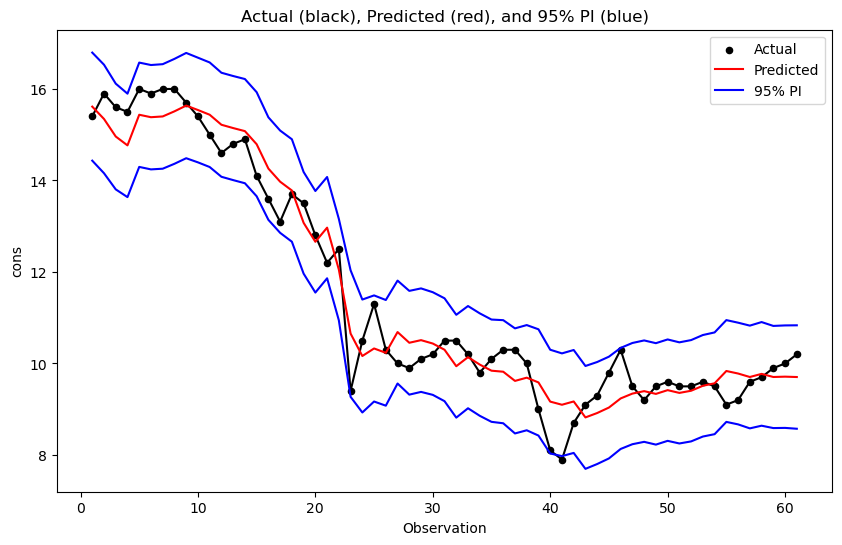

In [10]:
model_coffee_ts.plot_actual_fitted()

### Statistical Tests

#### Wald Test

In [11]:
model_coffee_ts.wald_test('(rpcofe = -0.018, rpcarb = 0.065)')

p-value:  0.0063


#### Ramsey Test (RESET)

In [12]:
model_coffee_ts.ramsey_test()

,power,pvalue
0,2,0.182315
1,3,0.372575


## Binary Choice Models

In [13]:
# import data
solar = pd.read_excel('../data/Solar_Data.xlsx').dropna()
solar_new = pd.read_excel('../data/Solar_New_Prospects.xlsx')

### Logit

In [14]:
solar_logit=tprstats.model("logit",formula="Sale~AnnualSave+AnnualCost+DrivesHybrid+NearbySolar+HomeValue",data=solar)
solar_logit.summary()

Optimization terminated successfully.
         Current function value: 0.102926
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sale   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1494
Method:                           MLE   Df Model:                            5
Date:                Mon, 27 Jan 2025   Pseudo R-squ.:                  0.2847
Time:                        23:53:36   Log-Likelihood:                -154.39
converged:                       True   LL-Null:                       -215.84
Covariance Type:            nonrobust   LLR p-value:                 7.619e-25
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -12.7445      4.837     -2.635      0.008     -22.224      -3.265
AnnualSave       3.9268      0.649      6.048      0.000       2.654       5.199
AnnualCost      -4.0989      1.475     -2.778      0.005      -6.990      -1.207
DrivesHybrid     0.9644      0.413      2.333      0.020       0.154       1.775
NearbySolar      1.9421      0.398      4.884      0.000       1.163       2.722
HomeValue        0.0178      0.008      2.192      0.028       0.002       0.034
================================================================================
"""

### Prediction

In [15]:
solar_logit.predict()

array([0.01617376, 0.00438152, 0.02321191, ..., 0.1497396 , 0.0078212 ,
       0.02681689], shape=(1500,))

In [16]:
solar_logit.classification_table()

[1176.0, 275.0, 6.0, 43.0]


,Summary,Actual,Predicted,Frequency
0,Correct,0,0,1176.0
1,Incorrect,0,1,275.0
2,Incorrect,1,0,6.0
3,Correct,1,1,43.0


In [17]:
X_out_of_sample = pd.DataFrame({
    "AnnualSave": [2.5, 1.9, 2.3],
    "AnnualCost": [1.8, 1.5, 1.7],
    "DrivesHybrid": [1,0,0],
    "NearbySolar": [0, 1, 0],
    "HomeValue": [550, 675, 495]
})
print("We create three homes: ")
print(X_out_of_sample)
print("Predicted Probabilities of purchase for the three homes are: ")
print(solar_logit.predict(X_out_of_sample))

We create three homes: 
   AnnualSave  AnnualCost  DrivesHybrid  NearbySolar  HomeValue
0         2.5         1.8             1            0        550
1         1.9         1.5             0            1        675
2         2.3         1.7             0            0        495
Predicted Probabilities of purchase for the three homes are: 
0    0.613822
1    0.927109
2    0.135068
dtype: float64


In [18]:
# marginal effects
solar_logit.marginal_effects()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                   Sale
Method:                          dydx
At:                           overall
================================================================================
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
AnnualSave       0.1013      0.018      5.535      0.000       0.065       0.137
AnnualCost      -0.1057      0.039     -2.721      0.007      -0.182      -0.030
DrivesHybrid     0.0249      0.011      2.312      0.021       0.004       0.046
NearbySolar      0.0501      0.011      4.611      0.000       0.029       0.071
HomeValue        0.0005      0.000      2.161      0.031    4.27e-05       0.001
================================================================================
"""

In [19]:
solar_logit.predict(solar_new)

0      0.200212
1      0.030138
2      0.006383
3      0.015173
4      0.003679
         ...   
995    0.001549
996    0.284837
997    0.800973
998    0.692739
999    0.000486
Length: 1000, dtype: float64

In [20]:
solar_logit.predict_and_rank(solar_new)

/workspaces/tprstats-python/src/tprstats/models.py:243: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  prospects["PredictionNew"] = self.predict(exog)
/workspaces/tprstats-python/src/tprstats/models.py:244: FutureWarning: ChainedAssignmentErr

,Intercept,AnnualSave,AnnualCost,DrivesHybrid,NearbySolar,HomeValue,PredictionNew,ProspectRank
980,1.0,3.009684,1.862946,0,0,574.450942,0.842685,1.0
938,1.0,3.244934,2.034931,0,0,556.284208,0.828255,2.0
850,1.0,2.792388,1.942580,0,1,525.557723,0.827666,3.0
871,1.0,2.900204,1.718183,0,0,555.587322,0.818398,4.0
817,1.0,3.181619,1.811254,0,0,513.716687,0.814978,5.0
...,...,...,...,...,...,...,...,...
999,1.0,0.708387,1.641288,0,0,508.298030,0.000486,996.0
385,1.0,1.111673,2.022553,0,0,506.252013,0.000478,997.0
935,1.0,0.863014,1.756444,0,0,496.592665,0.000451,998.0
54,1.0,0.664754,1.641288,0,0,508.298030,0.000409,999.0


### Probit

In [21]:
solar_probit=tprstats.model("probit",formula="Sale~AnnualSave+AnnualCost+DrivesHybrid+NearbySolar+HomeValue",data=solar)

Optimization terminated successfully.
         Current function value: 0.100579
         Iterations 9


In [22]:
solar_probit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                   Sale   No. Observations:                 1500
Model:                         Probit   Df Residuals:                     1494
Method:                           MLE   Df Model:                            5
Date:                Mon, 27 Jan 2025   Pseudo R-squ.:                  0.3010
Time:                        23:53:36   Log-Likelihood:                -150.87
converged:                       True   LL-Null:                       -215.84
Covariance Type:            nonrobust   LLR p-value:                 2.450e-26
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -6.5365      2.307     -2.833      0.005     -11.058      -2.015
AnnualSave       1.9807      0.314      6.310      0.000       1.365       2.596
AnnualCost      -2.1618      0.741     -2.917      0.004      -3.614      -0.709
DrivesHybrid     0.5292      0.205      2.581      0.010       0.127       0.931
NearbySolar      0.9933      0.197      5.044      0.000       0.607       1.379
HomeValue        0.0093      0.004      2.387      0.017       0.002       0.017
================================================================================
"""

### Prediction

In [23]:
solar_probit.predict()

array([0.01471621, 0.00226384, 0.02421279, ..., 0.16397987, 0.00457754,
       0.02389391], shape=(1500,))

In [24]:
print("Predicted Probabilities of purchase for the three synthetic homes in X_out_of_sample using probit.predict:")
print(solar_probit.predict(X_out_of_sample))

Predicted Probabilities of purchase for the three synthetic homes in X_out_of_sample using probit.predict:
0    0.561305
1    0.892098
2    0.143439
dtype: float64


In [25]:
solar_probit.classification_table()

[1168.0, 283.0, 6.0, 43.0]


,Summary,Actual,Predicted,Frequency
0,Correct,0,0,1168.0
1,Incorrect,0,1,283.0
2,Incorrect,1,0,6.0
3,Correct,1,1,43.0


In [26]:
solar_probit.marginal_effects()

<class 'statsmodels.iolib.summary.Summary'>
"""
       Probit Marginal Effects       
=====================================
Dep. Variable:                   Sale
Method:                          dydx
At:                           overall
================================================================================
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
AnnualSave       0.1026      0.018      5.784      0.000       0.068       0.137
AnnualCost      -0.1120      0.039     -2.866      0.004      -0.189      -0.035
DrivesHybrid     0.0274      0.011      2.556      0.011       0.006       0.048
NearbySolar      0.0514      0.011      4.784      0.000       0.030       0.073
HomeValue        0.0005      0.000      2.356      0.018    8.07e-05       0.001
================================================================================
"""

In [27]:
solar_probit.predict_and_rank(solar_new)

/workspaces/tprstats-python/src/tprstats/models.py:243: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  prospects["PredictionNew"] = self.predict(exog)
/workspaces/tprstats-python/src/tprstats/models.py:244: FutureWarning: ChainedAssignmentErr

,Intercept,AnnualSave,AnnualCost,DrivesHybrid,NearbySolar,HomeValue,PredictionNew,ProspectRank
980,1.0,3.009684,1.862946,0,0,574.450942,0.765859,1.0
850,1.0,2.792388,1.942580,0,1,525.557723,0.746185,2.0
938,1.0,3.244934,2.034931,0,0,556.284208,0.742462,3.0
871,1.0,2.900204,1.718183,0,0,555.587322,0.740998,4.0
817,1.0,3.181619,1.811254,0,0,513.716687,0.730488,5.0
...,...,...,...,...,...,...,...,...
999,1.0,0.708387,1.641288,0,0,508.298030,0.000036,996.0
385,1.0,1.111673,2.022553,0,0,506.252013,0.000030,997.0
935,1.0,0.863014,1.756444,0,0,496.592665,0.000029,998.0
54,1.0,0.664754,1.641288,0,0,508.298030,0.000025,999.0
